In [18]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [19]:
df = pd.read_csv('/kaggle/input/social-media-engagement-dataset/Social Media Engagement Dataset.csv')
df.head()

,post_id,timestamp,day_of_week,platform,user_id,location,language,text_content,hashtags,mentions,...,comments_count,impressions,engagement_rate,brand_name,product_name,campaign_name,campaign_phase,user_past_sentiment_avg,user_engagement_growth,buzz_change_rate
0,kcqbs6hxybia,2024-12-09 11:26:15,Monday,Instagram,user_52nwb0a6,"Melbourne, Australia",pt,Just tried the Chromebook from Google. Best pu...,#Food,NaN,...,701,18991,0.19319,Google,Chromebook,BlackFriday,Launch,0.0953,-0.3672,19.1
1,vkmervg4ioos,2024-07-28 19:59:26,Sunday,Twitter,user_ucryct98,"Tokyo, Japan",ru,Just saw an ad for Microsoft Surface Laptop du...,"#MustHave, #Food","@CustomerService, @BrandCEO",...,359,52764,0.05086,Microsoft,Surface Laptop,PowerRelease,Post-Launch,0.1369,-0.4510,-42.6
2,memhx4o1x6yu,2024-11-23 14:00:12,Saturday,Reddit,user_7rrev126,"Beijing, China",ru,What's your opinion about Nike's Epic React? ...,"#Promo, #Food, #Trending",NaN,...,643,8887,0.45425,Nike,Epic React,BlackFriday,Post-Launch,0.2855,-0.4112,17.4
3,bhyo6piijqt9,2024-09-16 04:35:25,Monday,YouTube,user_4mxuq0ax,"Lagos, Nigeria",en,Bummed out with my new Diet Pepsi from Pepsi! ...,"#Reviews, #Sustainable","@StyleGuide, @BrandSupport",...,743,6696,0.42293,Pepsi,Diet Pepsi,LaunchWave,Launch,-0.2094,-0.0167,-5.5
4,c9dkiomowakt,2024-09-05 21:03:01,Thursday,Twitter,user_l1vpox2k,"Berlin, Germany",hi,Just tried the Corolla from Toyota. Absolutely...,"#Health, #Travel","@BrandSupport, @InfluencerName",...,703,47315,0.08773,Toyota,Corolla,LocalTouchpoints,Launch,0.6867,0.0807,38.8


In [20]:
#check datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   post_id                  12000 non-null  object 
 1   timestamp                12000 non-null  object 
 2   day_of_week              12000 non-null  object 
 3   platform                 12000 non-null  object 
 4   user_id                  12000 non-null  object 
 5   location                 12000 non-null  object 
 6   language                 12000 non-null  object 
 7   text_content             12000 non-null  object 
 8   hashtags                 12000 non-null  object 
 9   mentions                 8059 non-null   object 
 10  keywords                 12000 non-null  object 
 11  topic_category           12000 non-null  object 
 12  sentiment_score          12000 non-null  float64
 13  sentiment_label          12000 non-null  object 
 14  emotion_type          

In [21]:
df.shape

(12000, 28)

In [22]:
df.duplicated().sum()

0

In [23]:
df.isnull().sum()

post_id                       0
timestamp                     0
day_of_week                   0
platform                      0
user_id                       0
location                      0
language                      0
text_content                  0
hashtags                      0
mentions                   3941
keywords                      0
topic_category                0
sentiment_score               0
sentiment_label               0
emotion_type                  0
toxicity_score                0
likes_count                   0
shares_count                  0
comments_count                0
impressions                   0
engagement_rate               0
brand_name                    0
product_name                  0
campaign_name                 0
campaign_phase                0
user_past_sentiment_avg       0
user_engagement_growth        0
buzz_change_rate              0
dtype: int64

There are 3941 mentions missing,since mentions are tagged names replacing it with 'none

In [24]:
df['mentions'] = df['mentions'].fillna("None")

In [25]:
df['mentions'].isnull().sum()

0

In [26]:
#Count number of mentions per post
df['mentions_count']=df['mentions'].str.count('@')
print(df['mentions_count'])

0        0
1        2
2        0
3        2
4        2
        ..
11995    2
11996    2
11997    2
11998    2
11999    1
Name: mentions_count, Length: 12000, dtype: int64


In [27]:
df['mentions_list']=df['mentions'].str.findall(r'@[\w.]+')
df['mentions_list'].head(5)

0                                  []
1       [@CustomerService, @BrandCEO]
2                                  []
3        [@StyleGuide, @BrandSupport]
4    [@BrandSupport, @InfluencerName]
Name: mentions_list, dtype: object

# Find most used mentions from mentions_list

In [28]:
#Flatten mentions
from collections import Counter
all_mentions=df['mentions_list'].sum()
top_common_mentions=Counter(all_mentions).most_common(10)

#dataframe for mentions mention,count
#converting top_common_mentions to dataframe
top10_df = pd.DataFrame(top_common_mentions, columns=['mention', 'count'])
top10_df

,mention,count
0,@IndustryExpert,866
1,@RetailSupport,843
2,@TechHelp,838
3,@BrandCEO,826
4,@CelebrityName,825
5,@InfluencerName,824
6,@BrandSupport,818
7,@ProductTeam,809
8,@CompetitorBrand,800
9,@StyleGuide,798


<Axes: title={'center': 'Top 10 Mentions'}, xlabel='mention', ylabel='count'>

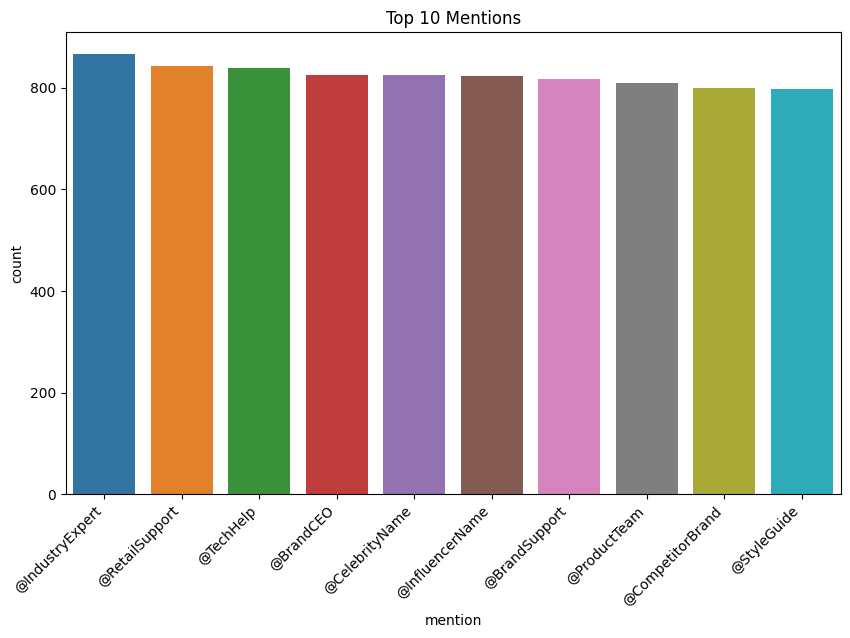

In [29]:
#Visualising the top 10 mentions
plt.figure(figsize=(10, 6))
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Mentions')
sns.barplot(x='mention', y='count', data=top10_df)

The Visualisation shows that users usually tag 'IndustryExpert', 'RetailSupport', 'TechHelp', indicating common patterns of seeking help, issue resolution, and tagging authoritative sources.
Additionally, mentions such as @BrandCeo,@CelebrityName, and @InfluencerName appear frequently, which likely reflects attempts to gain visibility or attract attention from high-profile accounts.
Brands can leverage these insights by 
a. Prioritizing engagement with these mentioned accounts
b. Collaborating with influencers or experts to drive conversation volume.


In [30]:
df.describe()

,sentiment_score,toxicity_score,likes_count,shares_count,comments_count,impressions,engagement_rate,user_past_sentiment_avg,user_engagement_growth,buzz_change_rate,mentions_count
count,12000.000000,12000.000000,12000.00000,12000.000000,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.00000
mean,0.000553,0.503868,2490.72025,1007.167167,504.34575,49811.338500,0.278137,0.001472,0.000998,0.729692,1.01150
std,0.583563,0.288198,1441.53253,575.072282,288.68416,28930.289451,1.149206,0.576627,0.289940,57.787219,0.81747
min,-0.999800,0.000000,0.00000,0.000000,0.00000,130.000000,0.001880,-0.999600,-0.499900,-99.900000,0.00000
25%,-0.503200,0.251400,1236.00000,510.000000,253.00000,24716.500000,0.049100,-0.495975,-0.248400,-48.700000,0.00000
50%,-0.006200,0.505950,2496.00000,1018.000000,503.00000,49674.000000,0.080605,0.001950,0.002800,0.900000,1.00000
75%,0.513525,0.756200,3723.25000,1501.000000,755.00000,74815.000000,0.163123,0.501725,0.250700,50.100000,2.00000
max,0.999900,0.999900,5000.00000,2000.000000,1000.00000,99997.000000,32.211710,0.999400,0.499900,99.900000,2.00000


In [31]:
#extracting all numeric columns and checking the correlation between them
numeric_df = df.select_dtypes(include='number')
numeric_df.head()
corr_matrix = numeric_df.corr()
corr_matrix

,sentiment_score,toxicity_score,likes_count,shares_count,comments_count,impressions,engagement_rate,user_past_sentiment_avg,user_engagement_growth,buzz_change_rate,mentions_count
sentiment_score,1.000000,0.007971,-0.017668,0.003066,0.007410,0.000241,-0.006186,0.005916,-0.012361,-0.005077,0.005313
toxicity_score,0.007971,1.000000,-0.008682,0.010909,-0.015858,0.013301,-0.016948,-0.006657,-0.001650,-0.003630,0.010099
likes_count,-0.017668,-0.008682,1.000000,0.002741,0.007044,0.002057,0.079048,0.003311,0.013230,0.011442,-0.017316
shares_count,0.003066,0.010909,0.002741,1.000000,0.024406,-0.008620,0.039080,0.005825,-0.006355,-0.006977,-0.011994
comments_count,0.007410,-0.015858,0.007044,0.024406,1.000000,-0.009496,0.012532,-0.017902,0.008701,0.006660,0.003637
impressions,0.000241,0.013301,0.002057,-0.008620,-0.009496,1.000000,-0.296366,0.012002,0.011495,0.001281,-0.000752
engagement_rate,-0.006186,-0.016948,0.079048,0.039080,0.012532,-0.296366,1.000000,-0.023479,-0.012019,-0.011873,0.006395
user_past_sentiment_avg,0.005916,-0.006657,0.003311,0.005825,-0.017902,0.012002,-0.023479,1.000000,-0.002603,0.006964,-0.009382
user_engagement_growth,-0.012361,-0.001650,0.013230,-0.006355,0.008701,0.011495,-0.012019,-0.002603,1.000000,0.001348,-0.001652
buzz_change_rate,-0.005077,-0.003630,0.011442,-0.006977,0.006660,0.001281,-0.011873,0.006964,0.001348,1.000000,-0.004521


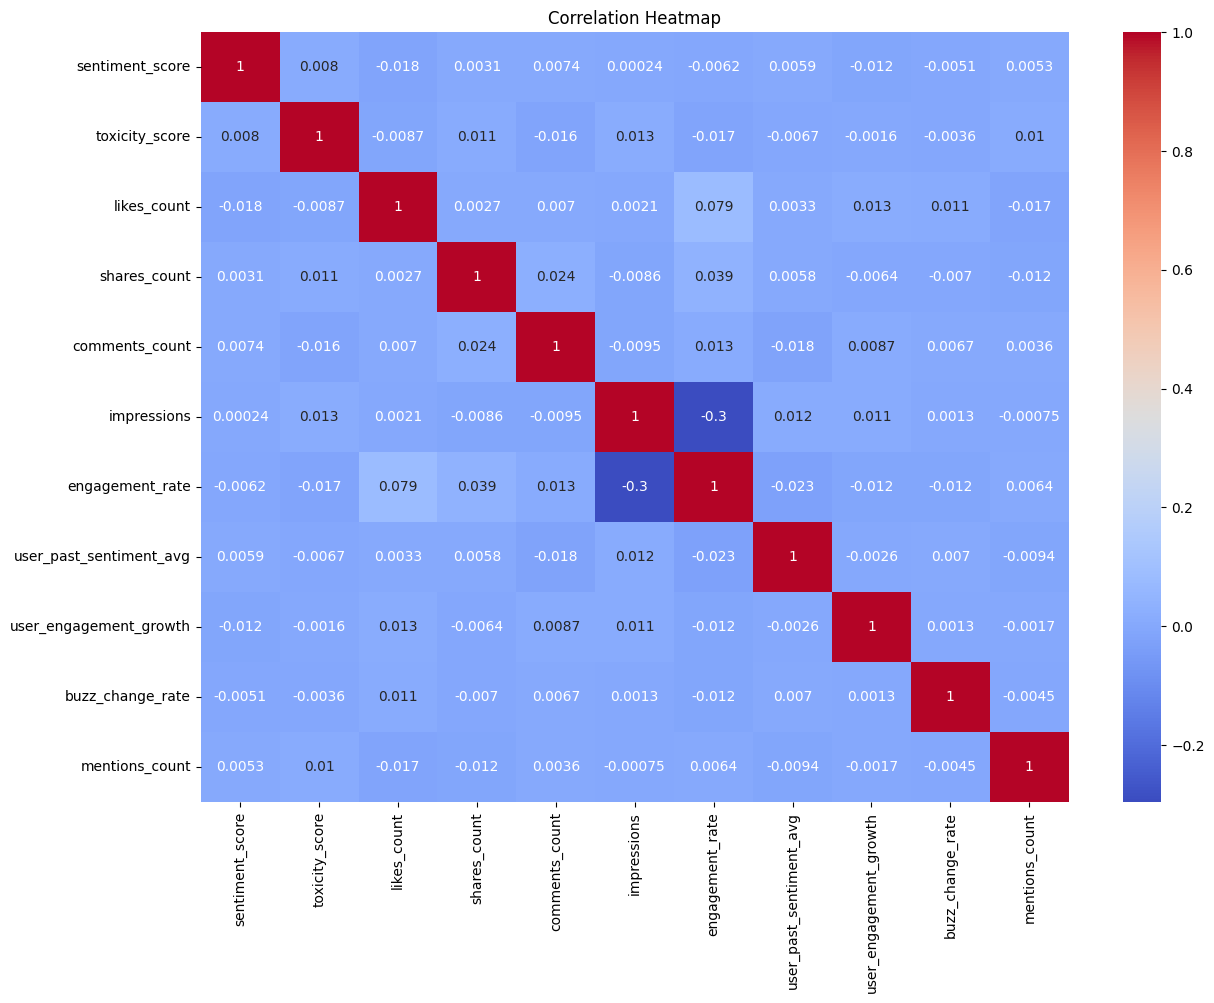

In [32]:
# visualizing the correlation
#Plotting a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Correlation between the numeric variables
 1. Engagement rate and impressions are negatively correlated-: -0.3,
  meaning a higher number of impressions or views is not resulting in High engagement.
  Insights- Improve Content Quality
- Make content keeping the target audience in mind
-Adjust strategy with ur engagement goals in mind
-Create variations of the ad and call to action to see what performs well
2. Likes count and share count are positively correlated with engagement rate with 0.07 and 0.0,3, respectively. This shows weak correlation.
Insights -: Getting Likes and shares are not the proper metric to evaluate your content success
- Focus on deeper interactions like saves, direct mentions, or messages
-Improve your content strategy..not merely to get likes and shares only
-focus on metrics that align with the platform's understanding of valuable content.

In [33]:
categorical_cols = df.select_dtypes(include='object').columns
print(categorical_cols)

Index(['post_id', 'timestamp', 'day_of_week', 'platform', 'user_id',
       'location', 'language', 'text_content', 'hashtags', 'mentions',
       'keywords', 'topic_category', 'sentiment_label', 'emotion_type',
       'brand_name', 'product_name', 'campaign_name', 'campaign_phase',
       'mentions_list'],
      dtype='object')


In [34]:
df.describe(include='O').T

,count,unique,top,freq
post_id,12000,12000,kcqbs6hxybia,1
timestamp,12000,11997,2024-07-29 19:40:44,2
day_of_week,12000,7,Wednesday,1771
platform,12000,5,YouTube,2436
user_id,12000,12000,user_52nwb0a6,1
location,12000,33,"Milan, Italy",403
language,12000,10,ja,1234
text_content,12000,11997,Loving it with my new Pepsi Zero Sugar from Pe...,2
hashtags,12000,4490,#NewRelease,153
mentions,12000,226,None,3941


# Interpretation

### The dataset contains 12000 social media posts, spanning content, user details, campaign information, and engagement-related text fields.

#### 1. post_id and user_ids are completely unique, showing 12000 unique values. Although the timestamp indicates that there could be 3 records that are duplicates.
#### 2. Posts come from 5 unique platforms, and YouTube is the most dominant one. The data set shows 33 unique locations, of which the maximum posts are from Milan, Italy.
#### 3. The dataset shows posts made in 10 unique languages, with Japanese being the most common language.
##### a.There are 4490 unique Hashtags. #NewRelease appears 153 times.
##### b.There are 3941 'None's' in the mentions, indicating a large share of posts don't tag other accounts

#### 4. There are 9342 unique keywords,  and the most frequent 'stylish & reliable' appears only 10 times, showing high semantic diversity.
#### 5. topic-category has 6 unique values, and pricing is the  most common, suggesting customer sensitivity to pricing-related discussions
#### 6. The sentiment label has 3 unique labels, of which the negative label is at the top, which shows datasets leaning towards negative sentiments, customer dissatisfaction, and complaints.
#### 7. The campaign phase has 3 unique labels: Pre-Launch (4006), being the most dominant, indicating heavy engagement in the pre-launch promotional period. 
#### 8. The dataset covers 10 unique brand names: Microsoft being the top, and the product name has 70 unique labels: Coca-Cola Vanilla being the top.

#### Overall conclusion:- The dataset is rich, diverse, and text-heavy with unique content across multiple platforms. A noticeable skew towards negative sentiments, price-related discussions, and a large number of posts without mentions are key patterns.


Feature Engineering

Extract Hour of day,Day Of week and weekend flag from Timestamp

In [35]:
#Converting timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df['timestamp'].head(5)
#Extract hour of the day
df['hour_of_day'] = df['timestamp'].dt.hour
df['hour_of_day'].head(5)
# Extract day of the week (0=Monday, 6=Sunday)
df['day_of_week_num'] = df['timestamp'].dt.dayofweek
df['day_of_week_num'].head(5)
# Create weekend flag (1 = weekend, 0 = weekday)
df['is_weekend'] = df['day_of_week_num'].isin([5, 6]).astype(int)
df['is_weekend'].head(5)



0    0
1    1
2    1
3    0
4    0
Name: is_weekend, dtype: int64

Engagement Features

In [36]:
df['like_to_impression'] = df['likes_count'] / (df['impressions'] + 1)
df['comment_to_like'] = df['comments_count'] / (df['likes_count'] + 1)
df['share_ratio'] = df['shares_count'] / (df['impressions'] + 1)

df['like_to_impression'].head(5)
df['comment_to_like'].head(5)
df['share_ratio'].head(5)

0    0.089722
1    0.034170
2    0.079320
3    0.039122
4    0.030497
Name: share_ratio, dtype: float64

Text Based Features

In [37]:
# Text length
df['text_length'] = df['text_content'].str.len()

# Hashtags & Mentions flags
df['has_hashtags'] = df['hashtags'].apply(lambda x: 0 if pd.isna(x) or x=="" else 1)
df['has_mentions'] = df['mentions'].apply(lambda x: 0 if pd.isna(x) or x=="" else 1)

# Number of hashtags & mentions
df['num_hashtags'] = df['hashtags'].apply(lambda x: len(str(x).split(',')) if pd.notna(x) and x!="" else 0)
df['mentions_list'] = df['mentions_list'].apply(lambda x: x if isinstance(x, list) else [])
df['num_mentions'] = df['mentions_list'].apply(len)

df[['text_length', 'has_hashtags', 'has_mentions', 'num_hashtags', 'num_mentions']].head()


,text_length,has_hashtags,has_mentions,num_hashtags,num_mentions
0,108,1,1,1,0
1,109,1,1,2,2
2,114,1,1,3,0
3,99,1,1,2,2
4,118,1,1,2,2


Converting categorical features into numeric

In [38]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
cat_cols

['post_id',
 'day_of_week',
 'platform',
 'user_id',
 'location',
 'language',
 'text_content',
 'hashtags',
 'mentions',
 'keywords',
 'topic_category',
 'sentiment_label',
 'emotion_type',
 'brand_name',
 'product_name',
 'campaign_name',
 'campaign_phase',
 'mentions_list']

In [39]:
for col in cat_cols:
  df[col] = label_encoder.fit_transform(df[col].astype(str))

In [40]:
df_encoded = df.copy()

df_encoded.dtypes

post_id                             int64
timestamp                  datetime64[ns]
day_of_week                         int64
platform                            int64
user_id                             int64
location                            int64
language                            int64
text_content                        int64
hashtags                            int64
mentions                            int64
keywords                            int64
topic_category                      int64
sentiment_score                   float64
sentiment_label                     int64
emotion_type                        int64
toxicity_score                    float64
likes_count                         int64
shares_count                        int64
comments_count                      int64
impressions                         int64
engagement_rate                   float64
brand_name                          int64
product_name                        int64
campaign_name                     

Predicting Engagement Levels

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [42]:
df_model=df.copy()

In [43]:
drop_cols=['post_id','user_id','mentions_list','timestamp']
df_model.drop(drop_cols,axis=1,inplace=True)

In [44]:
#Target_variable
target='engagement_rate'

#splitting the data 

X=df_model.drop(columns=[target])
y=df_model[target]

#Train,test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#Random Forest model
rf=RandomForestRegressor(n_estimators=300,random_state=42)
rf.fit(X_train,y_train)

#Predictions
y_pred=rf.predict(X_test)

#Evaluate

mse=mean_squared_error(y_test,y_pred)

print('MSE =:',mse)

MSE =: 0.025813665630630388


The MSE (Mean Squared Error i.e., the average squared difference between the predicted engagement rate by the model and the actual engagement rate is 0.02), which means the model's prediction rate is very close.

In [45]:
# Feature importance
importances = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values(by='importance', ascending=False)

print(importances.head(20))

                    feature  importance
28       like_to_impression    0.565160
16              impressions    0.361125
30              share_ratio    0.051905
13              likes_count    0.003256
14             shares_count    0.001974
23         buzz_change_rate    0.001811
21  user_past_sentiment_avg    0.001484
11             emotion_type    0.001220
18             product_name    0.001013
29          comment_to_like    0.000803
9           sentiment_score    0.000801
15           comments_count    0.000727
6                  mentions    0.000715
12           toxicity_score    0.000672
8            topic_category    0.000623
1                  platform    0.000612
5                  hashtags    0.000604
4              text_content    0.000510
25              hour_of_day    0.000507
31              text_length    0.000502


In [46]:
# Feature Importance
importances = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
})

# Add % and ranking
importances['importance_pct'] = (importances['importance'] * 100).round(2)
importances['rank'] = importances['importance'].rank(ascending=False).astype(int)

# Sort
importances = importances.sort_values(by='importance', ascending=False)

# Display
importances

,feature,importance,importance_pct,rank
28,like_to_impression,0.565160,56.52,1
16,impressions,0.361125,36.11,2
30,share_ratio,0.051905,5.19,3
13,likes_count,0.003256,0.33,4
14,shares_count,0.001974,0.20,5
23,buzz_change_rate,0.001811,0.18,6
21,user_past_sentiment_avg,0.001484,0.15,7
11,emotion_type,0.001220,0.12,8
18,product_name,0.001013,0.10,9
29,comment_to_like,0.000803,0.08,10


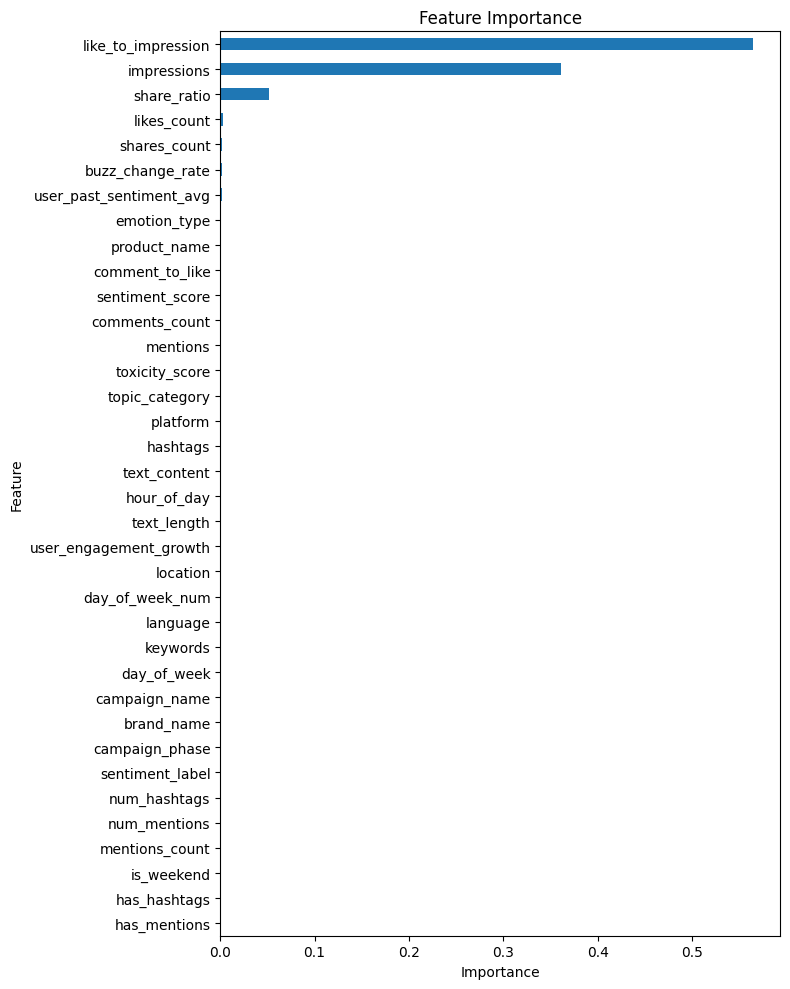

In [47]:
importances.sort_values(by='importance', ascending=True).plot(
    x='feature',
    y='importance',
    kind='barh',
    figsize=(8,10),
    legend=False
)

plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Interpretation of Feature Importance
This analysis gives a complete understanding of what features influence social media engagement.

### 1. Like_to_Impression:- 56% is the strongest predictor of engagement. A high like-to-impression ratio shows strong content quality, which improves engagement.
### 2. Impressions- 36.11 % which shows that reach matters, but if the content is not liked, there would be less engagement.

Conclusion:- The like-to-impression is the most powerful driver of engagement, showing the viewers liking the content has far more impact than raw reach, shares, or any other text-based features.